## Deep Learning Coding Project 1: Backpropogation

Before we start, please put your **Chinese** name and student ID in following format:

Name, 0000000000 // e.g.) 傅炜, 2021123123

杨一宁 2020010801

## Introduction

We will use Python 3 throughout this course. Besides, we recommend using [NumPy](https://numpy.org/) and [PyTorch](https://pytorch.org/) packages for implementation, and assignments will be tested under the latest stable release version.

In this notebook, you will derive and implement the gradient of several common functions/modules used in deep learning. We note that you are **NOT** allowed to use any autograd framework specially in this notebook, e.g. Tensorflow, PyTorch, JAX, etc.

In some cells and files you will see code blocks that look like this:

```Python
##############################################################################
#                  TODO: You need to complete the code here                  #
##############################################################################
raise NotImplementedError()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace `raise NotImplementedError()` with your own implementation based on the context, such as:

```Python
##############################################################################
#                  TODO: You need to complete the code here                  #
##############################################################################
y = w * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

```

When completing the notebook, please adhere to the following rules:

+ Do not write or modify any code outside of code blocks
+ Do not add or delete any cells from the notebook.
+ Run all cells before submission. We will not re-run the entire codebook during grading.

This notebook contains many inline sanity checks for the code you write. However, passing these sanity checks does not mean your code is correct! During grading we may run your code on additional inputs, and we may manually check your code to ensure correctness.

**Finally, avoid plagiarism! Any student who violates academic integrity will be seriously dealt with and receive an F for the course.**

## Setup Code

You have already learned how to do backpropagation for a linear layer in the lecture. Now you can try to derive the backpropagation for some other layers by yourself.

Let’s denote the loss function as $L$, the input to each layer as $z$ and the
output of each layer as $y$. We additionally assume that the gradient of the loss
function with respect to the output of the layer, i.e., $\frac{dL}{dy}$, is given.
Your goal is to derive:
1. The gradient of the loss function with respect to the input of the layer,
i.e., $\frac{dL}{dz}$;
2. (For linear layer and convolutional layer.) The gradient of the loss function with
respect to all trainable parameters, i.e., $\frac{dL}{d\textrm{weight}}$ and $\frac{d L}{d \textrm{bias}}$.

In [3]:
%load_ext autoreload
%autoreload 2

If you use Colab in this coding project, please uncomment the code, fill the `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` and run the following cells to mount your Google drive. Then, the notebook can find the required file (i.e., module.py). If you run the notebook locally, you can skip the following cells.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import os

# # TODO: Fill in the Google Drive path where you uploaded the assignment
# # Example: If you create a 2022SP folder and put all the files under CP1 folder, then '2022SP/CP1'
# # GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2022SP/CP1'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None 
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
# import sys
# sys.path.append(GOOGLE_DRIVE_PATH)

In [4]:
from module import hello
hello()

Hello from your TAs!


Finally, please run the following cell to import some base classes for implementation (no matter whether you use colab).

In [5]:
import numpy as np
from module import Zeros, XavierUniform, Activation, module

## Part A: Backpropation (7 pts)

### A.1: Linear Layer (2 pts)

We have provided the *_forward* function
of the linear module and you need to implement their *_backward* functions following your derivation. You need to return the gradient of inputs, and save the gradient of weight into `self.grads[“weight”]`, the gradient of bias into `self.grads[“bias”]`. Note that your implementation should support both batched and unbatched inputs, similar to `torch.nn.Linear`.

In [70]:
class Linear(module):
    def __init__(self, d_in, d_out, w_init=XavierUniform(), b_init=Zeros()):

        super().__init__()

        self.initializers = {
            "weight": w_init,
            'bias': b_init,
        }

        self.input = None
        self.d_in = d_in
        self.d_out = d_out

        if d_in:
            self.shapes = {
                "weight": [d_in, d_out],
                "bias": [d_out]
            }

            self._init_params()

    def _forward(self, inputs):
        if not self.is_init:
            d_in = inputs.shape[-1]
            self.shapes = {
                "weight": [d_in, self.d_out],
                "bias": [self.d_out]
            }
            self.d_in = d_in
            self._init_params()

        # `@` is the matrix multiplication operator in NumPy
        out = inputs @ self.params['weight'] + self.params['bias']
        self.input = inputs
        return out

    def _backward(self, grad):
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        self.grads['bias'] = grad
        self.grads['weight'] = np.outer(self.input, grad)
        # print("Linear shape")
        # print(self.params['weight'].shape)
        # print(grad.shape)
        # grad = np.reshape(grad, (1, -1))
        grad = np.reshape(grad, (-1, 1))
        grad_1 = self.params['weight'] @ grad
        grad_1 = np.reshape(grad_1, (1, -1))
        return grad_1
        # raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

    @property
    def param_names(self):
        return ('weight', 'bias')

    @property
    def weight(self):
        return self.params['weight']

    @property
    def bias(self):
        return self.params['bias']

In [71]:
x = np.array(
    [0.41259363, -0.40173373, -0.9616683, 0.32021663, 0.30066854], dtype=np.float32)
w = np.array([[-0.29742905, -0.4652604,  0.03716598],
              [0.63429886,  0.46831214,  0.22899507],
              [0.7614463,  0.45421863, -0.7652458],
              [0.6237591,  0.71807355,  0.81113386],
              [-0.34458044,  0.094055,  0.70938754]], dtype=np.float32)
b = np.array([0., 0., 0.], dtype=np.float32)

l = Linear(5, 3)
l.params['weight'] = w
l.params['bias'] = b
l.is_init = True
y = l._forward(x)
dx = l._backward(y)

grad_b = np.array([-1.0136619, -0.5586895,  1.1322811], dtype=np.float32)
grad_w = np.array([[-0.41823044, -0.23051172,  0.46717197],
                   [0.40722215,  0.2244444, -0.4548755],
                   [0.9748065,  0.53727394, -1.0888789],
                   [-0.32459137, -0.17890166,  0.36257523],
                   [-0.30477622, -0.16798034,  0.3404413]], dtype=np.float32)

assert (np.abs(l.grads['bias'] - grad_b) < 1e-5).all()
assert (np.abs(l.grads['weight'] - grad_w) < 1e-5).all()
print('success!')

success!


### A.2: 2D Convolutional Layer (2 pts)

Suppose your input tensor $z$ has shape $(C_{in},H_{in},W_{in})$ and output tensor $y$ has shape $(C_{out},H_{out},W_{out})$, where $C$ denotes the number of channels and $H$, $W$ denote the height and width of the images. A convolutional layer computes

$$y(j) = \text{bias}(j) +
\sum_{k = 0}^{C_{in} - 1} \text{weight}(j, k) \star z(k),\,\,\,\,\text{for}\,\,0\le j \le C_{out}-1$$

where "$\text{weight}$" is the convolutional kernal with size $(C_{out},C_{in},k_H,k_W)$, "$\text{bias}$" is of size $(C_{out},)$, and "$\star$" denotes the 2D convolution operator.

In [73]:
class Conv2D(module):
    """
    Implement 2D convolution layer
    :param kernel: A list/tuple of int that has length 4 (in_channels, height, width, out_channels)
    :param stride: A list/tuple of int that has length 2 (height, width)
    :param padding: String ["SAME", "VALID"]
    :param w_init: weight initializer
    :param b_init: bias initializer
    """

    def __init__(self,
                 kernel,
                 stride=(1, 1),
                 padding="SAME",
                 w_init=XavierUniform(),
                 b_init=Zeros()):
        super().__init__()

        self.kernel_shape = kernel
        self.stride = stride
        self.initializers = {"weight": w_init, "bias": b_init}
        self.shapes = {"weight": self.kernel_shape,
                       "bias": self.kernel_shape[-1]}

        self.padding_mode = padding
        assert padding in ['SAME', 'VALID']
        if padding == 'SAME' and stride != (1, 1):
            raise RunTimeError(
                "padding='SAME' is not supported for strided convolutions.")
        self.padding = None

        self._init_params()

    def _forward(self, inputs):
        """
        :param inputs:  shape (batch_size, in_c, in_h, in_w)
        :return outputs: shape (batch_size, out_c, out_h, out_w)
        where batch size is the number of images
        """
        assert len(
            inputs.shape) == 4, 'Expected shape of inputs is (batch_size, in_c, in_h, in_w).'
        in_c, k_h, k_w, out_c = self.kernel_shape
        s_h, s_w = self.stride
        X = self._inputs_preprocess(inputs)
        bsz, _, h, w = X.shape

        out_h = (h - k_h) // s_h + 1
        out_w = (w - k_w) // s_w + 1
        Y = np.zeros([bsz, out_c, out_h, out_w])
        for in_c_i in range(in_c):
            for out_c_i in range(out_c):
                kernel = self.params['weight'][in_c_i, :, :, out_c_i]
                for r in range(out_h):
                    r_start = r * s_h
                    for c in range(out_w):
                        c_start = c * s_w
                        patch = X[:, in_c_i, r_start: r_start +
                                  k_h, c_start: c_start+k_w] * kernel
                        Y[:, out_c_i, r,
                            c] += patch.reshape(bsz, -1).sum(axis=-1)
        self.input = inputs
        return Y + self.params['bias'].reshape(1, -1, 1, 1)

    def _backward(self, grad):
        """
        Compute gradients w.r.t layer parameters and backward gradients.
        :param grad: gradients from previous layer 
            with shape (batch_size, out_c, out_h, out_w)
        :return d_in: gradients to next layers 
            with shape (batch_size, in_c, in_h, in_w)
        """
        assert len(
            grad.shape) == 4, 'Expected shape of upstream gradient is (batch_size, out_c, out_h, out_w)'
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        batch_size, out_c, out_h, out_w = grad.shape
        in_c, k_h, k_w, out_c = self.kernel_shape
        input = self._inputs_preprocess(self.input)
        bsz, in_c, h, w = input.shape
        s_h, s_w = self.stride
        # print("shape")
        # print(grad.shape)
        # print(self.kernel_shape)
        # print(input.shape)
        self.grads['bias'] = np.sum(grad, axis = (0, 2, 3))
        self.grads['weight'] = np.zeros([in_c, k_h, k_w, out_c])
        dx = np.zeros([batch_size, in_c, h, w])
        for in_c_i in range(in_c):
            for out_c_i in range(out_c):
                kernel = self.params['weight'][in_c_i, :, :, out_c_i]
                for k_h_i in range(k_h):
                    for k_w_i in range(k_w):
                        ret = 0
                        for batch_id in range(batch_size):
                            mul1 = 0
                            for r in range(out_h):
                                for c in range(out_w):
                                    r_pos = r * s_h + k_h_i
                                    c_pos = c * s_w + k_w_i
                                    # print(r_pos, c_pos)
                                    mul1 += input[batch_id, in_c_i, r_pos, c_pos] * grad[batch_id, out_c_i, r, c]
                            ret += mul1
                            
                        self.grads['weight'][in_c_i, k_h_i, k_w_i, out_c_i] = ret
                for out_h_i in range(out_h):
                    for out_w_i in range(out_w):
                        r_start = out_h_i * s_h
                        c_start = out_w_i * s_w     
                        for batch_id in range(batch_size):
                            dx[batch_id, in_c_i, r_start : r_start + k_h, c_start : c_start + k_w] += kernel * grad[batch_id, out_c_i, out_h_i, out_w_i]
                
        dx = dx[ :, :, self.padding[2][0] : h-self.padding[2][1], self.padding[3][0] : w-self.padding[3][1]]
        return dx  
        # self.grads['weight'] = 
        # raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

    def _inputs_preprocess(self, inputs):
        _, _, in_h, in_w = inputs.shape
        _, k_h, k_w, _ = self.kernel_shape
        # padding calculation
        if self.padding is None:
            self.padding = self.get_padding_2d(
                (in_h, in_w), (k_h, k_w), self.stride, self.padding_mode)
        return np.pad(inputs, pad_width=self.padding, mode="constant")

    def get_padding_2d(self, in_shape, k_shape, stride, mode):

        def get_padding_1d(w, k, s):
            if mode == "SAME":
                pads = s * (w - 1) + k - w
                half = pads // 2
                padding = (half, half) if pads % 2 == 0 else (half, half + 1)
            else:
                padding = (0, 0)
            return padding

        h_pad = get_padding_1d(in_shape[0], k_shape[0], stride[0])
        w_pad = get_padding_1d(in_shape[1], k_shape[1], stride[1])
        return (0, 0), (0, 0), h_pad, w_pad

    @property
    def param_names(self):
        return "weight", "bias"

    @property
    def weight(self):
        return self.params['weight']

    @property
    def bias(self):
        return self.params['bias']

In [74]:
x = np.array([[[[-1.75957111,  0.0085911,  0.30235818],
                [-1.05931037,  0.75555462, -2.03922536],
                [0.86653209, -0.56438439, -1.68797524]],

               [[-0.74832044,  0.21611616,  0.571611],
                [-1.61335018, -0.37620906,  1.0353189],
                [-0.26074537,  1.98065489, -1.30691981]]],


              [[[0.32680334,  0.29817393,  2.25433969],
                [-0.16831957, -0.98864486,  0.36653],
                  [1.52712821,  1.19630751, -0.02024759]],

               [[0.48080474, -1.15229596, -0.95228854],
                  [-1.68168285, -2.86668484, -0.34833734],
                  [0.73179971,  1.69618114,  1.33524773]]]], dtype=np.float32)
w = np.array([[[[-0.322831,  0.38674766,  0.32847992,  0.3846352],
                [-0.21158722, -0.53467643, -0.28443742, -0.20367976]],

               [[0.4973593, -0.30178958, -0.02311361, -0.53795236],
                [-0.1229187, -0.12866518, -0.40432686,  0.5104686]]],


              [[[0.19288206, -0.49516755, -0.26484585, -0.35625377],
                [0.5058061, -0.17490079, -0.40337119,  0.10058666]],

               [[-0.24815331,  0.34114942, -0.06982624,  0.4017606],
                  [0.16874631, -0.42147416,  0.43324274,  0.16369782]]]], dtype=np.float32)
b = np.array([0., 0., 0., 0.], dtype=np.float32)

# print(x.shape)
# print(w.shape)

l = Conv2D(kernel=(2, 2, 2, 4), padding='SAME', stride=(1, 1))
l.params['weight'] = w
l.params['bias'] = b
l.is_init = True
y = l._forward(x)
l._backward(y)

grad_b = np.array([-0.49104962,  1.4335476,  2.70048173, -
                  0.0098734], dtype=np.float32)
grad_w = np.array([[[[-3.0586028,   7.7819834,   1.3951588,   5.9249396],
                     [-1.5760803, -10.541515,  -2.694372,  -3.9848034]],

                    [[2.9096646,   0.6696263,   8.230143,  -0.3434674],
                     [-2.9487448,  -3.264796,  -1.1822633,   4.1672387]]],


                   [[[3.7202294,  -5.4176836, -10.34358,  -6.4479938],
                     [7.0336857,  -0.41946477,  -8.181945,   3.0968976]],
                         
                    [[0.25020388,  13.39637,   5.8576417,  12.522377],
                       [3.360495,  -6.597466,   8.375789,   3.8179488]]]], dtype=np.float32)

assert (np.abs(l.grads['bias'] - grad_b) < 1e-5).all()
assert (np.abs(l.grads['weight'] - grad_w) < 1e-5).all()
print('success!')

success!


### A.3: 2D Max-Pooling Layer (1 pt)

Suppose your input tensor $z$ has shape $(C,H_{in},W_{in})$ and output tensor $y$ has shape $(C,H_{out},W_{out})$, where $C$ denotes the number of channels and $H$, $W$ denote the height and width of the images. Suppose the kernel size of $(k_H,k_W)$. A max-pooling layer computes

\begin{aligned}
    y(j, h, w) ={} & \max_{m=0, \ldots, k_H-1} \max_{n=0, \ldots, k_W-1} z(j, \text{stride[0]} \times h + m, \text{stride[1]} \times w + n)
\end{aligned}


In [75]:
class MaxPool2D(module):

    def __init__(self, pool_size, stride, padding="VALID"):
        """
        Implement 2D max-pooling layer
        :param pool_size: A list/tuple of 2 integers (pool_height, pool_width)
        :param stride: A list/tuple of 2 integers (stride_height, stride_width)
        :param padding: A string ("SAME", "VALID")
        """
        super().__init__()
        self.kernel_shape = pool_size
        self.stride = stride

        self.padding_mode = padding
        self.padding = None

    def _forward(self, inputs):
        """
        :param inputs:  shape (batch_size, in_c, in_h, in_w)
        """
        s_h, s_w = self.stride
        k_h, k_w = self.kernel_shape
        batch_sz, in_c, in_h, in_w = inputs.shape

        # zero-padding
        if self.padding is None:
            self.padding = self.get_padding_2d(
                (in_h, in_w), (k_h, k_w), self.stride, self.padding_mode)
        X = np.pad(inputs, pad_width=self.padding, mode="constant")
        padded_h, padded_w = X.shape[2:4]

        out_h = (padded_h - k_h) // s_h + 1
        out_w = (padded_w - k_w) // s_w + 1

        # construct output matrix and argmax matrix
        max_pool = np.empty(shape=(batch_sz, in_c, out_h, out_w))
        argmax = np.empty(shape=(batch_sz, in_c, out_h, out_w), dtype=int)
        for r in range(out_h):
            r_start = r * s_h
            for c in range(out_w):
                c_start = c * s_w
                pool = X[:, :, r_start: r_start+k_h, c_start: c_start+k_w]
                pool = pool.reshape((batch_sz, in_c, -1))

                _argmax = np.argmax(pool, axis=2)[:, :, np.newaxis]
                # print(_argmax)
                argmax[:, :, r, c] = _argmax.squeeze(axis=2)

                # get max elements
                _max_pool = np.take_along_axis(
                    pool, _argmax, axis=2).squeeze(axis=2)
                max_pool[:, :, r, c] = _max_pool

        self.X_shape = X.shape
        self.out_shape = (out_h, out_w)
        self.argmax = argmax
        # print(argmax)
        # print(argmax.shape)
        return max_pool

    def _backward(self, grad):
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        s_h, s_w = self.stride
        k_h, k_w = self.kernel_shape
        batch_sz, in_c, in_h, in_w = self.X_shape
        batch_sz, in_c, out_h, out_w = self.argmax.shape
        # print("X shape")
        # print(self.X_shape)
        # grad_ = np.zeros([batch_sz, in_c, in_h, in_w])
        # for batch_id in range(batch_sz):
        #     for in_c_i in range(in_c):
        #         for in_h_i in range(in_h):
        #             for in_w_i in range(in_w):
        #                 for out_h_i in range(out_h):
        #                     if in_h_i < out_h_i * s_h or in_h_i >= (out_h_i + 1) * s_h:
        #                         continue
        #                     for out_w_i in range(out_w):
        #                         if in_w_i < out_w_i * s_w or in_w_i >= (out_w_i + 1) * s_w:
        #                             continue
        #                         #print("In loop")
        #                         h_id = in_h_i - out_h_i * s_h
        #                         w_id = in_w_i - out_w_i * s_w
        #                         if self.argmax[batch_id, in_c_i, out_h_i, out_w_i] == h_id * k_w + w_id:
        #                             grad_[batch_id, in_c_i, in_h_i, in_w_i] = grad[batch_id, in_c_i, out_h_i, out_w_i]
        ret = np.zeros(self.X_shape) 
        for batch_id in range(batch_sz):
            for in_c_i in range(in_c):
                for out_h_i in range(out_h):
                    for out_w_i in range(out_w):
                        argmax_pos_r = out_h_i * s_h + self.argmax[batch_id, in_c_i, out_h_i, out_w_i] // k_w
                        argmax_pos_c = out_w_i * s_w + self.argmax[batch_id, in_c_i, out_h_i, out_w_i] % k_w
                        ret[batch_id, in_c_i, argmax_pos_r, argmax_pos_c] = grad[batch_id, in_c_i, out_h_i, out_w_i]
        return ret
        #for channel_id in range()
        # raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

    def get_padding_2d(self, in_shape, k_shape, stride, mode):

        def get_padding_1d(w, k, s):
            if mode == "SAME":
                pads = s * (w - 1) + k - w
                half = pads // 2
                padding = (half, half) if pads % 2 == 0 else (half, half + 1)
            else:
                padding = (0, 0)
            return padding

        h_pad = get_padding_1d(in_shape[0], k_shape[0], stride[0])
        w_pad = get_padding_1d(in_shape[1], k_shape[1], stride[1])
        return (0, 0), (0, 0), h_pad, w_pad

In [76]:
x = np.array([[[[-2.23317337,  0.9750834, -1.30762567, -0.71442179],
                [0.24624013, -1.77593893, -0.43530428,  1.03446008],
                [1.58317228, -0.66459249,  0.54894879, -1.19706709],
                [0.06013156,  1.05886458,  0.26634763,  1.03497421]]],


              [[[2.20214308, -0.53358514,  0.96765812, -1.74976553],
                [-0.07049627,  0.88147726,  2.15051543, -0.78627764],
                  [1.19180886,  0.00468398, -1.74774108,  0.18564536],
                  [1.39397303, -1.0462731,  0.4786774, -0.51543751]]]], dtype=np.float32)

l = MaxPool2D(pool_size=(2, 2), stride=(2, 2))
l.is_init = True
y = l._forward(x)
grad_ = l._backward(y)

grad = np.array([[[[0., 0.9750834, 0., 0.],
                   [0., 0., 0., 1.0344601],
                   [1.5831723, 0., 0., 0.],
                   [0., 0., 0., 1.0349742]]],


                 [[[2.2021432, 0., 0., 0.],
                   [0., 0., 2.1505153, 0.],
                     [0., 0., 0., 0.],
                     [1.393973, 0., 0.4786774, 0.]]]], dtype=np.float32)
#print(grad)
#print(grad_)
assert (np.abs(grad - grad_) < 1e-5).all()
print('success!')

success!


### A.4: Miscellaneous (1 pt)

Reshaping is necessary for a typical convolutional neural network, because image features should be flattened and sent into an MLP for classification. Similarly, implement the *_backward* function of reshaping layer.

Next, you need to implement the gradient function of a ReLU and a tanh activation function. The ReLU function is defined as

$$y=\max (0,z)$$

and the tanh function is defined as

$$y=\frac{\exp(z)-\exp(-z)}{\exp(z)+\exp(-z)}$$.

In [77]:
class Reshape(module):

    def __init__(self, *output_shape):
        super().__init__()
        self.output_shape = output_shape
        self.input_shape = None

    def _forward(self, inputs):
        self.input_shape = inputs.shape
        # print("reshape shape")
        # print(inputs.shape)
        return inputs.reshape(inputs.shape[0], *self.output_shape)

    def _backward(self, grad):
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        return grad.reshape(self.input_shape)
        raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

In [78]:
class ReLU(Activation):

    def func(self, x):
        return np.maximum(x, 0.0)

    def _backward(self, grad):
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        return (self.inputs >= 0) * grad
        raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

In [79]:
class Tanh(Activation):

    def func(self, x):
        return np.tanh(x)

    def _backward(self, grad):
        ##############################################################################
        #                  TODO: You need to complete the code here                  #
        ##############################################################################
        # YOUR CODE HERE
        # return (1 - np.tanh(self.inputs) ** 2) * grad
        return (1 - np.power(np.tanh(self.inputs), 2)) * grad
        raise NotImplementedError()
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

### A.5 It's time to build your own network! (1 pt)

We provide an example. Run the following cell to check your implementation.

In [80]:
layers = [
    Conv2D([2, 3, 3, 10]),
    ReLU(),
    MaxPool2D([3, 3], [2, 2]),
    Reshape(-1),
    Linear(10, 10),
    Tanh(),
]
layers[0].params["weight"] = np.array(
    [[[[0.10034741, -0.10923018, -0.13951169,  0.02620922,
       0.11209463, -0.03927368,  0.2455522,  0.09440251,
      -0.00973911, -0.0551014],
     [-0.08009744,  0.11698803, -0.03137447, -0.22489624,
      -0.05207429,  0.12155709, -0.16216859, -0.16576429,
       0.01611499,  0.01625606],
     [0.06864581,  0.17847365,  0.11464144,  0.05670569,
       0.11361383, -0.09042443, -0.07059199, -0.13879062,
      -0.10536136,  0.06689657]],

      [[-0.208334, -0.03386239, -0.03531212, -0.00322536,
        -0.03788247, -0.09588832, -0.03761636,  0.20092505,
        0.22685647,  0.00093809],
     [0.06330945, -0.19632441, -0.09332216, -0.04350284,
       0.18709384, -0.1274559, -0.00866532,  0.24800156,
       0.0099521,  0.05766132],
     [-0.1937654,  0.16667984,  0.05263836,  0.02301866,
          -0.08030899, -0.10004608, -0.04238123,  0.09260008,
          0.19176605,  0.00532325]],

      [[0.08647767,  0.04389243,  0.06379496,  0.08922312,
        0.17485274, -0.2128848,  0.13467704, -0.1309234,
        -0.15617682,  0.03700767],
     [-0.20649141,  0.19680719,  0.06499291,  0.11411078,
          -0.2471389,  0.04823145,  0.02900326, -0.1741877,
          -0.1771956,  0.09986747],
     [-0.09256576,  0.09804958,  0.02777646, -0.05671893,
          0.21713808,  0.17450929, -0.07283475, -0.23311245,
          -0.09971547, -0.05200206]]],


     [[[0.10468353,  0.25300628, -0.07359204,  0.13409732,
       0.04759048,  0.09791245, -0.17818803, -0.05164933,
       -0.13235886, -0.07995545],
       [0.00670526,  0.08510415, -0.20128378, -0.18852185,
       -0.0909241,  0.08251962,  0.17697941,  0.0272014,
       0.18103799, -0.05881954],
       [-0.0935763, -0.07443489, -0.16799624,  0.16809557,
      -0.08239949,  0.02674822,  0.04012047,  0.01099809,
      -0.25400403,  0.24942434]],

        [[0.2070298, -0.14932613, -0.10598685,  0.01022026,
          0.20527782,  0.24701637, -0.12383634,  0.03287163,
          0.15678546, -0.05395091],
         [0.11802146, -0.17311034,  0.05143219,  0.1868667,
            0.24696055, -0.21484058, -0.03659691, -0.15090589,
            -0.02521261,  0.02439543],
         [-0.20770998, -0.10375416,  0.21839033,  0.03524392,
            -0.02175199,  0.12948939,  0.12353204, -0.23056503,
            0.10659301,  0.17326987]],

        [[-0.17062354,  0.1435208, -0.10902726, -0.09884633,
          0.08440794, -0.19848298,  0.08420925,  0.19809937,
          0.10026675, -0.03047777],
         [-0.03155725,  0.13539886,  0.03352691, -0.21201183,
            0.04222458,  0.16080765, -0.08321898,  0.21838641,
            0.1280547,  0.03782839],
         [0.12852815, -0.21495132,  0.18355937,  0.16420949,
            0.20934355, -0.18967807, -0.21360746, -0.18468067,
            -0.05139272, -0.03866057]]]], dtype=np.float32)

layers[4].params['weight'] = np.array(
    [[0.06815682, -0.41381145, -0.32710046,  0.34138927, -0.03506786,
     0.33732942, -0.5395874,  0.056517,  0.47315797,  0.0900187],
     [-0.321956,  0.23854145, -0.13256437,  0.18445538, -0.51560444,
     0.14887139, -0.51245147,  0.26814377, -0.02967232, -0.41434735],
     [0.04670532, -0.47457483,  0.1680028,  0.54343534,  0.29511,
     0.08081549, -0.43529126,  0.21890727,  0.17655055, -0.49393934],
     [0.32019785,  0.020503, -0.08120787,  0.31569323, -0.09687106,
     -0.02078467, -0.34875813, -0.19573534,  0.37851244, -0.34297976],
     [-0.09060311,  0.53571045, -0.28854045,  0.45661694,  0.45833147,
        -0.44771242, -0.03981645,  0.00242787, -0.20411544, -0.4958647],
        [-0.2829692, -0.4430751, -0.28673285,  0.33716825,  0.43267703,
         -0.50037426, -0.21695638,  0.5264514,  0.04327536,  0.13836497],
        [-0.54164785, -0.01653088,  0.5349371, -0.13672741, -0.44142258,
         -0.04172686,  0.507196, -0.17326587,  0.32745343,  0.32736975],
        [-0.319598, -0.06203758,  0.23617937, -0.09802067, -0.3384849,
         0.51211435,  0.16513875,  0.4003412, -0.5200709, -0.2553419],
     [0.00226878, -0.47383627,  0.54009086, -0.28869098, -0.13770601,
     -0.31328425, -0.4322124, -0.29305372, -0.21842065,  0.14727412],
        [-0.23964529, -0.15086825, -0.5412125, -0.14709733,  0.03712023,
         -0.3702431,  0.10673262, -0.22659011,  0.14465407, -0.5190256]],
    dtype=np.float32)

x = np.array(
    [[[[-0.8492061,  1.0779045, -0.08430817, -0.16879],
     [-0.21486154, -1.3411552,  0.64358956,  0.09206003],
     [-1.0160062,  0.75887114,  1.7270764,  0.12690294],
     [-0.10278344, -0.57746404, -0.16129336, -0.42453188]],

        [[-0.51087075,  1.566093, -0.35502744, -1.0280341],
         [-0.44904083, -0.91717184, -0.2204062, -1.7094339],
         [-0.20429765,  0.96035904,  1.1546314, -0.55592376],
         [-3.0869954, -0.13439347,  1.047694, -0.16260263]]]],
    dtype=np.float32)

for l in layers:
    x = l._forward(x)

y = x

e = np.array(
    [[0.32257673, -0.43416652,  1.0324798, -0.19434273,  0.59407026,
      -0.19911239,  0.2908744,  0.27966267,  0.24996994, -0.97430784]],
    dtype=np.float32)

for l in reversed(layers):
    e = l._backward(e)

dx = e

target = np.array(
    [[[[0.05311276,  0.0012092, -0.01387816, -0.09388599],
     [-0.07132251,  0.00879665,  0.15649047, -0.09754436],
     [-0.01795623,  0.00153671, -0.08608256,  0.04023483],
     [0.01426923, -0.07778768, -0.03364746, -0.02747378]],

        [[-0.07534513, -0.10424455, -0.00875467,  0.04870174],
         [0.01257615, -0.1349132, -0.05684724, -0.09846888],
         [-0.0293199,  0.01961213, -0.02899574,  0.17384738],
         [-0.03952359,  0.0342231,  0.14877939, -0.00817257]]]],
    dtype=np.float32)

if dx.shape == target.shape and np.abs(target - dx).max() < 1e-4:
    print("success!")
else:
    print("fail!")

success!


## Part B: Get Your Hand Dirty (3 pts)

In this problem, you need to train a neural network with different hyperparameters to solve the spiral classification problem in your browser: https://playground.tensorflow.org/#dataset=spiral, and answer the following questions. Please include necessary visualizations for all your attempts to solve this problem.

### B.1 Show Your Results

List your best set of hyper-parameters and show us your best result, how
do you find this configuration?

#![image](Q1_1.png)

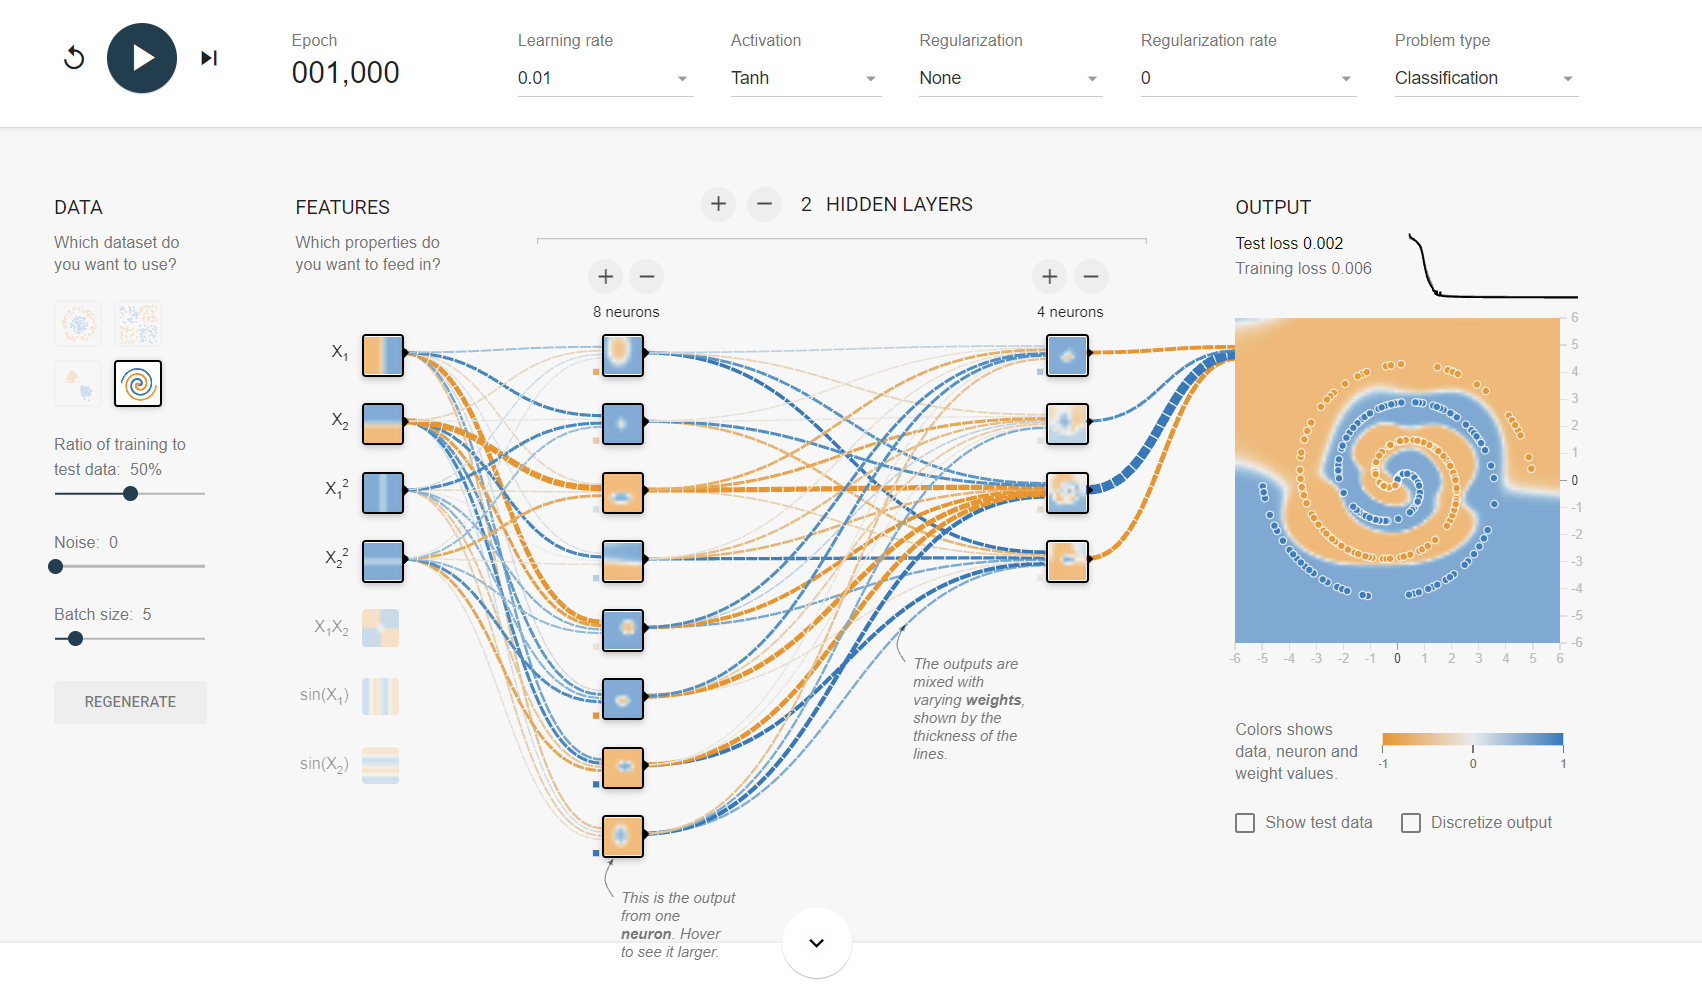

In [69]:
from IPython.display import Image
Image(filename = 'Q1_1.png', width = 960, height = 720)

I obtain the set of parameter through continuous tuning.

### B.2 Show Your Findings

List your findings that how the learning rate, the number of hidden sizes,
and the regularization influence the performance and convergence rate.

* learning rate

An appropriate learning rate is essential. If learning rate is too small, it would be hard for the model to converge. If the learning rate is too big, the model may easily jump out of an optimal point, affecting the model performance.

* the number of hidden layers

The choice of hidden layers is kind of tradeoff. Too many hidden layers may cause the model the overfit, also slowing dow n the convergence rate. However, too few hidden layers may not have enough capacity the fit the model, causing malfunctions.

* the regularization

If the model has too many hidden layers, i.e. too many parameters, we need regularization to avoid overfitting.